<a href="https://colab.research.google.com/github/itsjustdannyb/detection-and-segmentation/blob/main/fcn_semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### get the image

In [21]:
!wget -O dog.jpeg https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjByLDs6D0bE4J1lJG2xBXaeMSNnkYNMiITB3wzY526Ht3eRhtFxUWIthcZYTinyUse7JpCqutxRvi231-blrA-TygqZus0uw7ZrXGbQaAECwNc4betsCNod4VFf4RHsDgjdxcbXoxl2A/s1600/dog-jumping.jpg
img_path = "/content/dog.jpeg"

--2025-01-02 16:35:15--  https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjByLDs6D0bE4J1lJG2xBXaeMSNnkYNMiITB3wzY526Ht3eRhtFxUWIthcZYTinyUse7JpCqutxRvi231-blrA-TygqZus0uw7ZrXGbQaAECwNc4betsCNod4VFf4RHsDgjdxcbXoxl2A/s1600/dog-jumping.jpg
Resolving blogger.googleusercontent.com (blogger.googleusercontent.com)... 74.125.26.132, 2607:f8b0:400c:c04::84
Connecting to blogger.googleusercontent.com (blogger.googleusercontent.com)|74.125.26.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92561 (90K) [image/jpeg]
Saving to: ‘dog.jpeg’

dog.jpeg            100%[===================>]  90.39K  --.-KB/s    in 0.001s  

2025-01-02 16:35:15 (93.7 MB/s) - ‘dog.jpeg’ saved [92561/92561]



In [38]:
import torch
import torchvision
from torchvision.io.image import decode_image
from torchvision.transforms.functional import to_pil_image
import numpy
from PIL import Image

import matplotlib.pyplot as plt

In [6]:
weights = torchvision.models.segmentation.FCN_ResNet101_Weights.DEFAULT
model = torchvision.models.segmentation.fcn_resnet101(weights=weights)

Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth
100%|██████████| 208M/208M [00:03<00:00, 69.3MB/s]


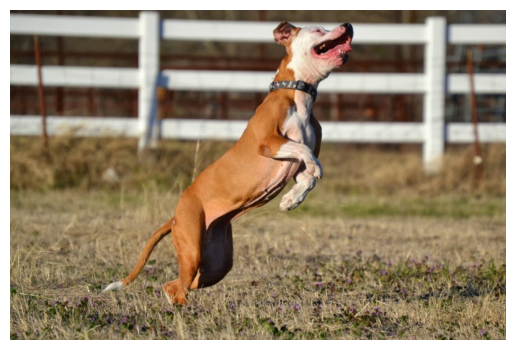

In [22]:
img = decode_image(img_path)
plt.imshow(img.permute(1,2,0))
plt.axis(False)
plt.show()

In [23]:
img.shape

torch.Size([3, 533, 800])

In [50]:
# run inference on image
model.eval()
transforms = weights.transforms()
batch = transforms(img).unsqueeze(0) # add batch dimension

pred = model(batch)

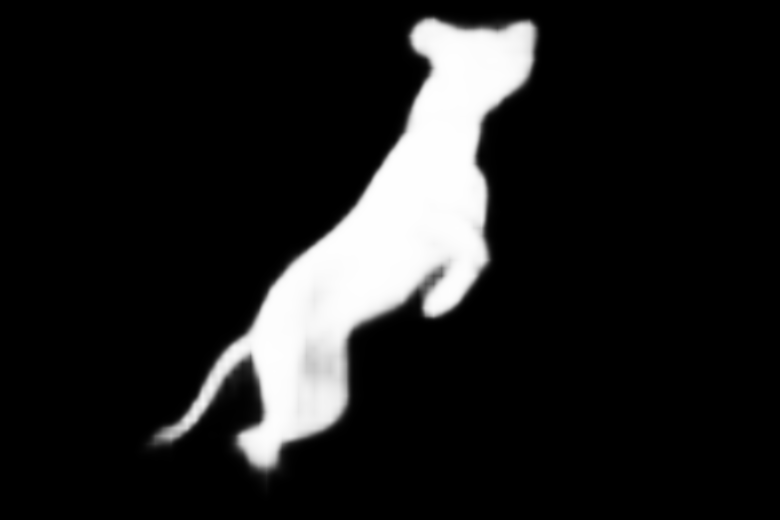

In [51]:
pred = pred["out"]
normalized_mask = pred.softmax(dim=1)
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
mask = normalized_mask[0, class_to_idx["dog"]]
to_pil_image(mask)


(-0.5, 779.5, 519.5, -0.5)

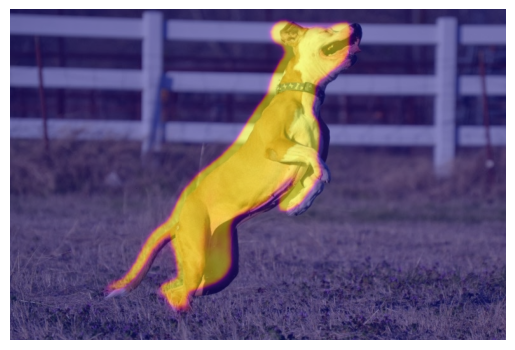

In [58]:
# Show the original image
plt.imshow(img.permute(1,2,0), cmap='gray')
plt.axis('off')

# Overlay the mask with transparency
plt.imshow(to_pil_image(mask), cmap='plasma', alpha=0.5)  # Adjust alpha for transparency (0 = transparent, 1 = opaque)
plt.axis('off')